<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="left"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


In [1106]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.dates import DateFormatter
import statsmodels.api as sm
import matplotlib.dates as mdates

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import shapiro
from statsmodels.tsa.stattools import adfuller

# Lab - Séries temporais

### Responda as seguinte perguntas usando os dados Airline Passenger Numbers




In [1107]:
import pandas as pd
passenger = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
passenger_ = passenger
passenger_.dtypes

Month         object
Passengers     int64
dtype: object

In [1108]:
print(f'shape dataset rows: {passenger.shape[0]} and columns: {passenger.shape[1]}')

shape dataset rows: 144 and columns: 2


*   A série é estacionária?
*   A amplitude do componente sazonal varia à medida que a tendência aumenta? Qual modelo deveria ser usado multiplicativo ou aditivo?
*   Em quais meses vende-se, em média, mais (menos) passagens aereas?
*   Agrupando os valores por meses, em algum mês observa-se um valor discrepante (outlier)?
*   Determinar o aumento (ou diminuição) percentual das vendas médias registradas em janeiro em relação a dezembro.
Dica: Calcula a diferença entre as vendas médias em janeiro e as vendas médias em dezembro, divide pelo valor das vendas médias em dezembro e multiplica por 100 .
*   Ajuste um modelo de regressão (sem considerar os dados do último ano). Faça as previsões para o seguinte ano. Calcule o Erro médio de previsão: Média entre as diferenças absolutas do valor previsto e o valor real correspondente.
*   Decompor a série em trend+saz+residuals. Qual o componente sazonal para os meses: janeiro, junho e dezembro.
*   Analise como formam decompostos (tend+saz+resid) os valores observados no último trimestre.
*   Faça um histograma dos residuals, eles seguem uma distribuição normal? Use a função shapiro da biblioteca scipy.stats para verificar a normalidade.
*   Verifique estatísticamente se os resíduos são estacionários.

In [1109]:
passenger['Month'] = pd.to_datetime(passenger['Month'])


In [1110]:
passenger.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

### A série é estacionária? Resposta no grafico.

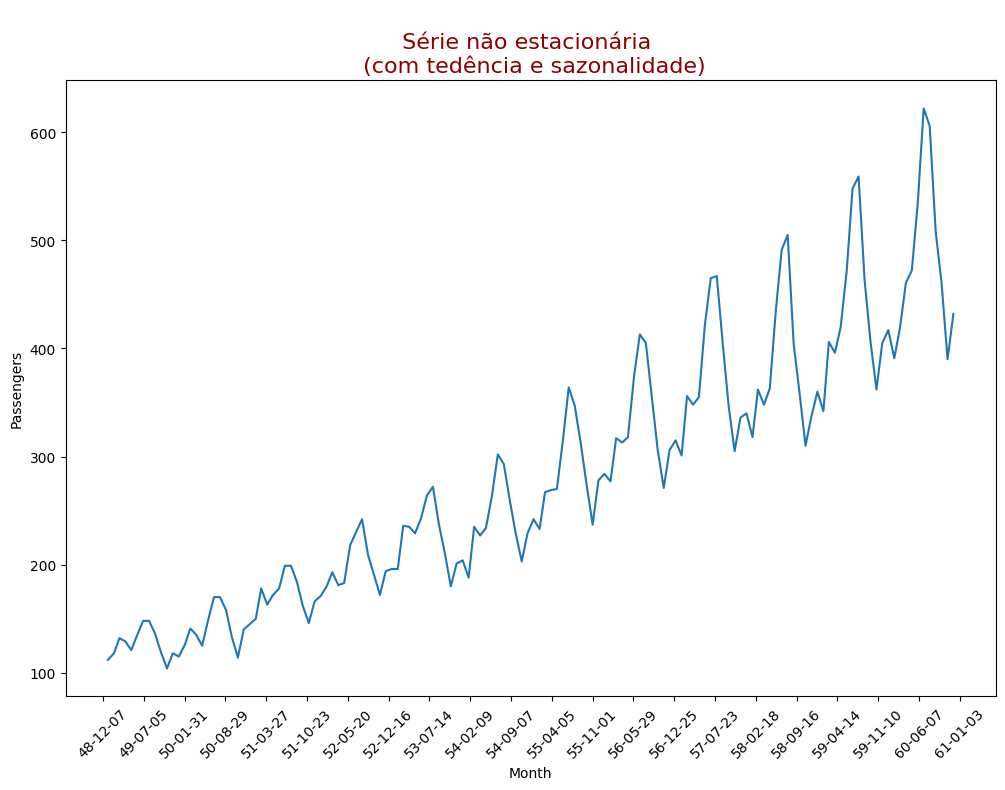

In [1111]:
fig, ax = plt.subplots(figsize = (12,8))
fig = sns.lineplot(x='Month', y='Passengers', data=passenger.sort_values('Month'), ax=ax)

# Define the date format
date_form = DateFormatter("%y-%m-%d")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=30))
ax.set_title('\n Série não estacionária  \n (com tedência e sazonalidade)',fontdict = {'fontsize' : 16},color="darkred")
plt.xticks(rotation=45)
plt.show()

In [1112]:
passenger['Month'] = pd.to_datetime(passenger['Month'])
passenger = passenger.set_index('Month')

### A amplitude do componente sazonal varia à medida que a tendência aumenta? Qual modelo deveria ser usado multiplicativo ou aditivo?

Como a amplitude sazonal é proporcional ao nível de vendas de passagens, ou seja, a variação sazonal aumenta à medida que as vendas totais aumentam, seria mais apropriado usar um modelo multiplicativo.

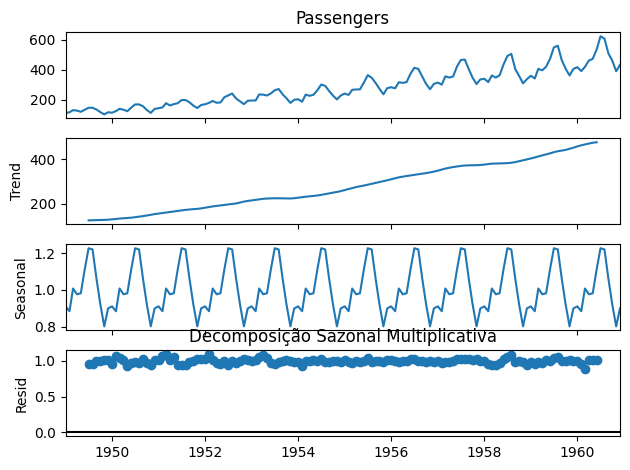

In [1113]:
# Decomposição sazonal multiplicativa
result_multiplicativo = sm.tsa.seasonal_decompose(passenger['Passengers'], model='multiplicative')
result_multiplicativo.plot()
plt.title('Decomposição Sazonal Multiplicativa')
plt.show()

In [1114]:
passenger_.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [1115]:
L = ['year', 'month', 'day']
passenger_ = passenger_.join(pd.concat([getattr(passenger_['Month'].dt, i).rename(i) for i in L], axis=1))
passenger = passenger_
passenger_original = passenger_

passenger_ = passenger_.drop(columns=['Month', 'day', 'year'])
passenger_

,Passengers,month
0,112,1
1,118,2
2,132,3
3,129,4
4,121,5
...,...,...
139,606,8
140,508,9
141,461,10
142,390,11


In [1116]:
g = passenger_.groupby("month").mean()

g

,Passengers
month,
1,241.750000
2,235.000000
3,270.166667
4,267.083333
5,271.833333
6,311.666667
7,351.333333
8,351.083333
9,302.416667


In [1117]:
# Find the max and min values
max_value = g['Passengers'].max()
min_value = g['Passengers'].min()

### Em quais meses vende-se, em média, mais (menos) passagens aereas?

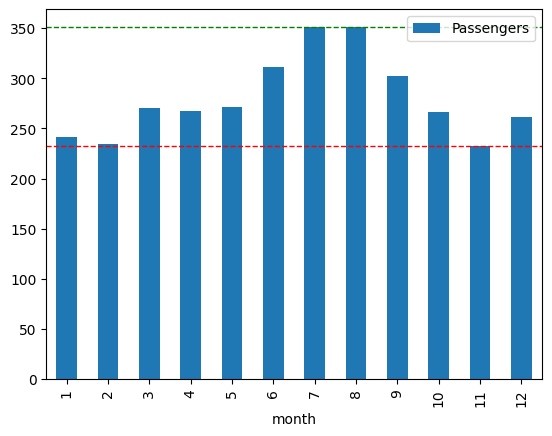

In [1118]:
g.plot(kind="bar")
plt.axhline(y=max_value,linewidth=1, color='g', linestyle='--')
plt.axhline(y=min_value,linewidth=1, color='r', linestyle='--')

In [1119]:
print(f'Max passsengers {round(max_value, 2)} Meses Julho e Agosto')
print(f'Min passsengers {round(min_value, 2)} Meses Fevereiro e Novembro')

Max passsengers 351.33 Meses Julho e Agosto
Min passsengers 232.83 Meses Fevereiro e Novembro


In [1120]:
x = passenger_['month']
y = passenger_['Passengers']

### Agrupando os valores por meses, em algum mês observa-se um valor discrepante (outlier)?

Text(0, 0.5, 'Passengers')

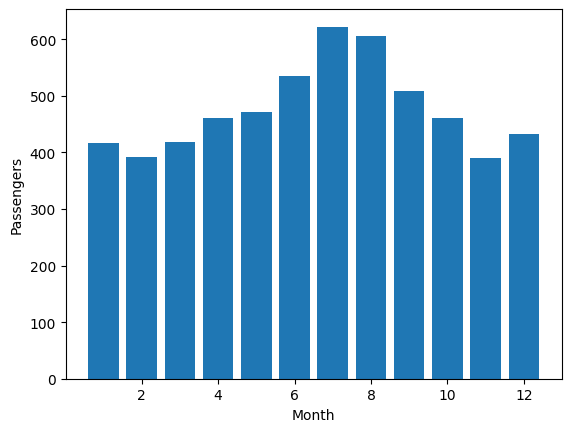

In [1121]:
# checking for outliers.
plt.bar(x,y,align='center') # A bar chart
plt.xlabel('Month')
plt.ylabel('Passengers')

<Axes: xlabel='month', ylabel='Passengers'>

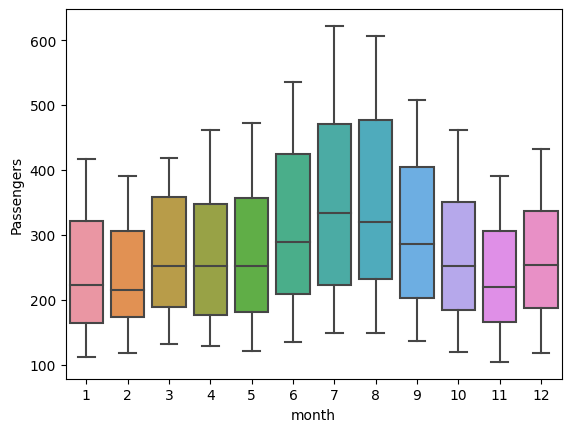

In [1122]:

sns.boxplot(x='month', y='Passengers', data=passenger_)

### FROM THIS PLOT, THE DATA DOES NOT SHOW OUTLIERS.

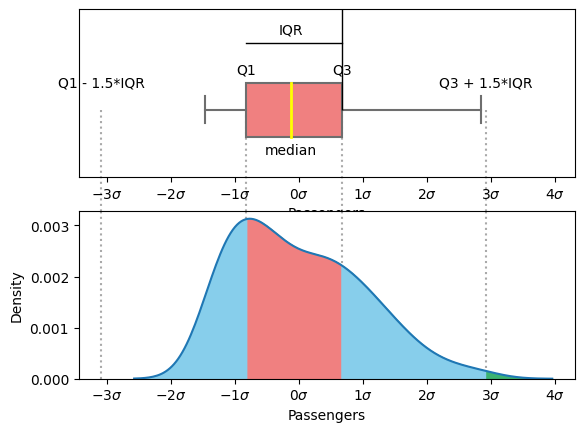

In [1123]:

mean = y.mean()
std = y.std()

q1, median, q3 = np.percentile(y, [25, 50, 75])
iqr = q3 - q1

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

medianprops = dict(linestyle='-', linewidth=2, color='yellow')

sns.boxplot(x=y, color='lightcoral', saturation=1, medianprops=medianprops,
            flierprops={'markerfacecolor': 'mediumseagreen'}, whis=1.5, ax=ax1)

ticks = [mean + std * i for i in range(-4, 5)]
ticklabels = [f'${i}\\sigma$' for i in range(-4, 5)]

ax1.set_xticks(ticks)
ax1.set_xticklabels(ticklabels)
ax1.set_yticks([])
ax1.tick_params(labelbottom=True)
ax1.set_ylim(-1, 1.5)
ax1.errorbar([q1, q3], [1, 1], yerr=[0, 1], color='black', lw=1)
ax1.text(q1, 0.6, 'Q1', ha='center', va='center', color='black')
ax1.text(q3, 0.6, 'Q3', ha='center', va='center', color='black')
ax1.text(median, -0.6, 'median', ha='center', va='center', color='black')
ax1.text(median, 1.2, 'IQR', ha='center', va='center', color='black')
ax1.text(q1 - 1.5*iqr, 0.4, 'Q1 - 1.5*IQR', ha='center', va='center', color='black')
ax1.text(q3 + 1.5*iqr, 0.4, 'Q3 + 1.5*IQR', ha='center', va='center', color='black')
ax1.vlines([q1 - 1.5*iqr, q1, q3, q3 + 1.5*iqr], 0, -2, color='darkgrey', ls=':', clip_on=False, zorder=0)

sns.kdeplot(y, ax=ax2)
kdeline = ax2.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()

ylims = ax2.get_ylim()
ax2.fill_between(xs, 0, ys, color='mediumseagreen')
ax2.fill_between(xs, 0, ys, where=(xs >= q1 - 1.5*iqr) & (xs <= q3 + 1.5*iqr), color='skyblue')
ax2.fill_between(xs, 0, ys, where=(xs >= q1) & (xs <= q3), color='lightcoral')
ax2.vlines([q1 - 1.5*iqr, q1, q3, q3 + 1.5*iqr], 0, 100, color='darkgrey', ls=':', zorder=0)
ax2.set_ylim(0, ylims[1])
plt.show()


### Determinar o aumento (ou diminuição) percentual das vendas médias registradas em janeiro em relação a dezembro.

#### Dica: Calcula a diferença entre as vendas médias em janeiro e as vendas médias em dezembro, divide pelo valor das vendas médias em dezembro e multiplica por 100

In [1124]:
passenger = passenger.drop(columns=['Month', 'day'])

In [1125]:
means = passenger.groupby('month')['Passengers'].mean()
mean_janeiro = means.iloc[0]
mean_dezembro = means.iloc[11]

perc = round(((mean_janeiro - mean_dezembro)/mean_dezembro)*100, 2)

print(f'Percentual de venda..........: {perc}%')

Percentual de venda..........: -7.67%


### Ajuste um modelo de regressão (sem considerar os dados do último ano). Faça as previsões para o seguinte ano. Calcule o Erro médio de previsão: Média entre as diferenças absolutas do valor previsto e o valor real correspondente.

In [1126]:
passenger_original = passenger_original.drop(columns=['year', 'month', 'day'])
passenger_origin = passenger_original.copy()
passenger_origin


,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [1127]:
#passenger_original['Month'] = pd.to_datetime(passenger_original['Month'])
passenger_original["Month"] = passenger_original["Month"].values.astype('datetime64[ns]')
passenger_original.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [1128]:
# Convert 'Month' to datetime format and set it as the index
passenger_original.set_index('Month', inplace=True)
passenger_original

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [1129]:
passenger_original.dtypes

Passengers    int64
dtype: object

In [1130]:
# Split the data into training and testing sets (excluding the last year)
train_data = passenger_original[passenger_original.index < '1960-01-01']
test_data = passenger_original[passenger_original.index >= '1960-01-01']


In [1131]:
# Extract features and target variable
X_train = train_data.index.astype('datetime64[ns]').values.reshape(-1, 1)
y_train = train_data['Passengers']

In [1132]:
X_test = test_data.index.astype('datetime64[ns]').values.reshape(-1, 1)
y_test = test_data['Passengers']

In [1133]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [1134]:
X_test = X_test.astype('datetime64[D]')
X_test = X_test.astype('float')

In [1135]:
# Make predictions for the test set
predictions = model.predict(X_test)

In [1136]:
# Calculate the Mean Absolute Prediction Error (MAPE)
mape = mean_absolute_error(y_test, predictions)

In [1137]:
print(f"The Mean Absolute Prediction Error (MAPE) is: {mape:.2f}")

The Mean Absolute Prediction Error (MAPE) is: 264.50


#### Decompor a série em trend+saz+residuals. Qual o componente sazonal para os meses: janeiro, junho e dezembro.

In [1138]:
passenger_origin

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


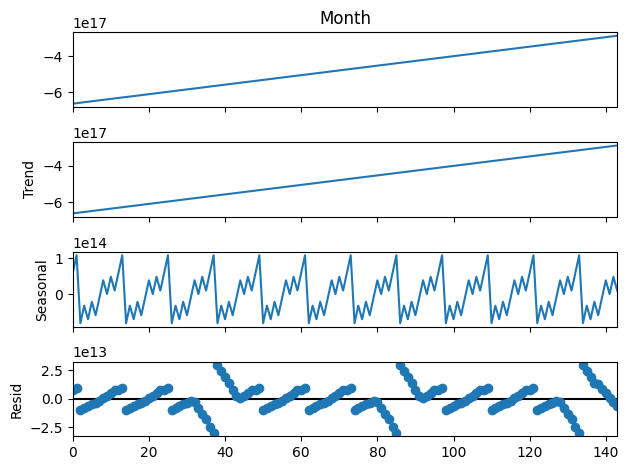

In [1139]:
decomposition=seasonal_decompose(passenger_origin['Month'],
                                 model='additive',
                                 period=12,
                                 extrapolate_trend='freq')
decomposition.plot();

In [1140]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [1141]:
passenger_origin["trend"]=trend
passenger_origin["seasonal"]=seasonal
passenger_origin["residual"]=residual
passenger_origin

,Month,Passengers,trend,seasonal,residual
0,1949-01-01,112,-6.627564e+17,6.034572e+13,8.054283e+12
1,1949-02-01,118,-6.601284e+17,1.089457e+14,9.854283e+12
2,1949-03-01,132,-6.575004e+17,-8.005428e+13,-9.945717e+12
3,1949-04-01,129,-6.548724e+17,-3.145428e+13,-8.145717e+12
4,1949-05-01,121,-6.522444e+17,-6.925428e+13,-6.345717e+12
...,...,...,...,...,...
139,1960-08-01,606,-2.972156e+17,-9.285752e+12,8.908129e+12
140,1960-09-01,508,-2.945815e+17,3.910760e+13,4.835052e+12
141,1960-10-01,461,-2.919475e+17,8.009615e+11,1.061976e+12
142,1960-11-01,390,-2.893134e+17,4.889432e+13,-2.711101e+12


In [1142]:
passenger_origin = passenger_origin.join(pd.concat([getattr(passenger_origin['Month'].dt, i).rename(i) for i in L], axis=1))
passenger_origin = passenger_origin.drop(columns=['Month' , 'day'])
passenger_origin

,Passengers,trend,seasonal,residual,year,month
0,112,-6.627564e+17,6.034572e+13,8.054283e+12,1949,1
1,118,-6.601284e+17,1.089457e+14,9.854283e+12,1949,2
2,132,-6.575004e+17,-8.005428e+13,-9.945717e+12,1949,3
3,129,-6.548724e+17,-3.145428e+13,-8.145717e+12,1949,4
4,121,-6.522444e+17,-6.925428e+13,-6.345717e+12,1949,5
...,...,...,...,...,...,...
139,606,-2.972156e+17,-9.285752e+12,8.908129e+12,1960,8
140,508,-2.945815e+17,3.910760e+13,4.835052e+12,1960,9
141,461,-2.919475e+17,8.009615e+11,1.061976e+12,1960,10
142,390,-2.893134e+17,4.889432e+13,-2.711101e+12,1960,11


In [1143]:
passenger_seazonal = passenger_origin[passenger_origin.month==1] # janeiro
passenger_seazonal['seasonal']

0      6.034572e+13
12     6.034572e+13
24     6.034572e+13
36     6.034572e+13
48     6.034572e+13
60     6.034572e+13
72     6.034572e+13
84     6.034572e+13
96     6.034572e+13
108    6.034572e+13
120    6.034572e+13
132    6.034572e+13
Name: seasonal, dtype: float64

In [1144]:
passenger_seazonal = passenger_origin[passenger_origin.month==6] # junho
passenger_seazonal['seasonal']

5     -2.065428e+13
17    -2.065428e+13
29    -2.065428e+13
41    -2.065428e+13
53    -2.065428e+13
65    -2.065428e+13
77    -2.065428e+13
89    -2.065428e+13
101   -2.065428e+13
113   -2.065428e+13
125   -2.065428e+13
137   -2.065428e+13
Name: seasonal, dtype: float64

In [1145]:
passenger_seazonal = passenger_origin[passenger_origin.month==12] # dezembro
passenger_seazonal['seasonal']

11     1.058767e+13
23     1.058767e+13
35     1.058767e+13
47     1.058767e+13
59     1.058767e+13
71     1.058767e+13
83     1.058767e+13
95     1.058767e+13
107    1.058767e+13
119    1.058767e+13
131    1.058767e+13
143    1.058767e+13
Name: seasonal, dtype: float64

### Analise como formam decompostos (tend+saz+resid) os valores observados no último trimestre.

In [1146]:
passenger_origin.loc[passenger_origin['month'].isin([10, 11, 12])]

,Passengers,trend,seasonal,residual,year,month
9,119,-6.391044e+17,8.009615e+11,2.799038e+12,1949,10
10,104,-6.364764e+17,4.889432e+13,5.105682e+12,1949,11
11,118,-6.338484e+17,1.058767e+13,7.412325e+12,1949,12
21,133,-6.075684e+17,8.009615e+11,2.799038e+12,1950,10
22,114,-6.049404e+17,4.889432e+13,5.105682e+12,1950,11
23,140,-6.023124e+17,1.058767e+13,7.412325e+12,1950,12
33,162,-5.760216e+17,8.009615e+11,-8.000962e+12,1951,10
34,146,-5.733864e+17,4.889432e+13,-1.289432e+13,1951,11
35,166,-5.707512e+17,1.058767e+13,-1.778767e+13,1951,12
45,191,-5.444100e+17,8.009615e+11,2.799038e+12,1952,10


### Faça um histograma dos residuals, eles seguem uma distribuição normal? Use a função shapiro da biblioteca scipy.stats para verificar a normalidade.


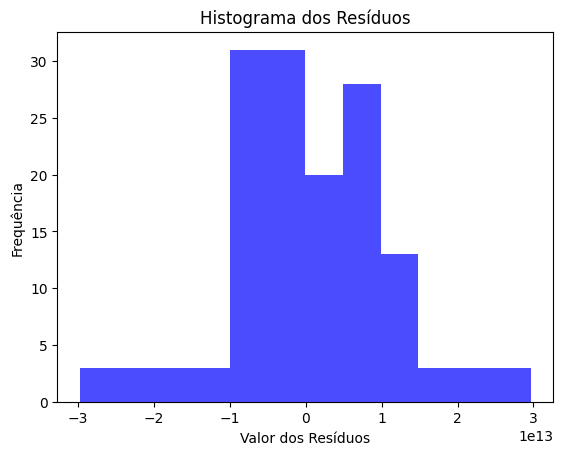

In [1147]:
# Plotando um histograma dos resíduos
plt.hist(residual.dropna(), bins='auto', color='blue', alpha=0.7)
plt.title('Histograma dos Resíduos')
plt.xlabel('Valor dos Resíduos')
plt.ylabel('Frequência')
plt.show()

In [1148]:
# Verificando a normalidade usando o teste de Shapiro-Wilk
stat, p_valor = shapiro(residual.dropna())

In [1149]:
print(f"Estatística de teste: {round(stat, 4)}")
print(f"P-valor: {round(p_valor, 5)}")

Estatística de teste: 0.9653
P-valor: 0.00104


In [1150]:
# Interpretando o resultado do teste
alpha = 0.05
if p_valor > alpha:
    print("Os resíduos parecem seguir uma distribuição normal (não rejeitamos a hipótese nula).")
else:
    print("Os resíduos não parecem seguir uma distribuição normal (rejeitamos a hipótese nula).")

Os resíduos não parecem seguir uma distribuição normal (rejeitamos a hipótese nula).


### Verifique estatísticamente se os resíduos são estacionários.

In [1151]:
# Teste de Estacionariedade dos Resíduos usando o teste ADF
resultado_adf = adfuller(residual.dropna(), autolag='AIC')

In [1152]:
# Interpretando o resultado do teste ADF
print("Estatística ADF:", resultado_adf[0])
print("P-valor:", resultado_adf[1])
print("Valores Críticos:", resultado_adf[4])

Estatística ADF: -4.5629165970528325
P-valor: 0.0001510999681283117
Valores Críticos: {'1%': -3.481281802271349, '5%': -2.883867891664528, '10%': -2.5786771965503177}


In [1153]:
# Verificando a estacionariedade
if resultado_adf[1] <= 0.05:
    print("Os resíduos são estacionários (rejeitamos a hipótese nula).")
else:
    print("Os resíduos não são estacionários (não rejeitamos a hipótese nula).")

Os resíduos são estacionários (rejeitamos a hipótese nula).
